## One-way ANOVA

In [ ]:
pip install pingouin

In [10]:
import pandas as pd
import seaborn as sns
import pingouin as pg

df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/clintrial.csv")

In [11]:
df.head()

,drug,therapy,mood_gain
0,placebo,no.therapy,0.5
1,placebo,no.therapy,0.3
2,placebo,no.therapy,0.1
3,anxifree,no.therapy,0.6
4,anxifree,no.therapy,0.4


<AxesSubplot:xlabel='drug', ylabel='mood_gain'>

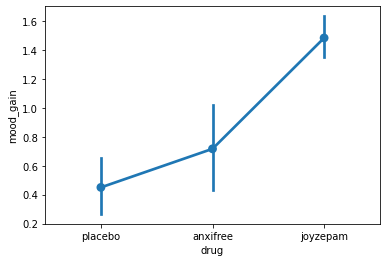

In [12]:
sns.pointplot(data = df, x = 'drug', y = 'mood_gain')

In [14]:
aov = pg.anova(data=df, dv='mood_gain', between='drug', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,drug,3.453333,2,1.726667,18.610778,0.000086,0.712762
1,Within,1.391667,15,0.092778,NaN,NaN,NaN


## Two-way ANOVA

In [16]:
df.head()

,drug,therapy,mood_gain
0,placebo,no.therapy,0.5
1,placebo,no.therapy,0.3
2,placebo,no.therapy,0.1
3,anxifree,no.therapy,0.6
4,anxifree,no.therapy,0.4


<AxesSubplot:xlabel='drug', ylabel='mood_gain'>

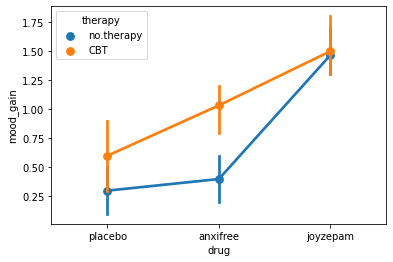

In [17]:
sns.pointplot(data = df, x = 'drug', y = 'mood_gain', hue = 'therapy')

In [18]:
df.anova(dv="mood_gain", between=["drug", "therapy"]).round(3)


,Source,SS,DF,MS,F,p-unc,np2
0,drug,3.453,2,1.727,31.714,0.000,0.841
1,therapy,0.467,1,0.467,8.582,0.013,0.417
2,drug * therapy,0.271,2,0.136,2.490,0.125,0.293
3,Residual,0.653,12,0.054,NaN,NaN,NaN


## One-way Repeated Measures ANOVA

In [25]:
#df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/stroop_2021_long.csv")
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/plants_leaves.csv")
df.head()

,Id,W1,W2,W3,W4,W5
0,P1,4,5,6,8,10
1,P2,3,4,6,6,9
2,P3,6,7,9,10,12
3,P4,5,7,8,10,12
4,P5,5,6,7,8,10


<AxesSubplot:>

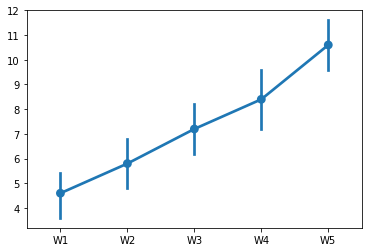

In [26]:
sns.pointplot(data = df)

In [28]:
pg.rm_anova(df)

# for long format data, see: https://pingouin-stats.org/generated/pingouin.rm_anova.html#pingouin.rm_anova

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,Within,4,16,146.27027,2.214820e-12,0.973381,0.541964


## Two-way Repeated Measures ANOVA

In [29]:
df = pd.read_csv("https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/stroop_2021_long.csv")
#df = pd.read_csv("https://raw.githubusercontent.com/marsja/jupyter/master/Python_ANOVA/rmAOV1way.csv")
df.head()

,participant,Condition,Time
0,1,ReadingNoInt,5.79
1,2,ReadingNoInt,5.26
2,3,ReadingNoInt,5.02
3,4,ReadingNoInt,4.87
4,5,ReadingNoInt,4.62


In [30]:
pg.rm_anova(df)

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,Within,1,123,101.132937,9.950550e-18,0.451219,1.0


In [ ]:
aov = pg.rm_anova(dv='DesireToKill',
...                   within=['Disgustingness', 'Frighteningness'],
...                   subject='Subject', data=df)